# Hyperparameter Tuning

In [19]:
import pandas as pd
import sklearn.metrics as m
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
plt.style.use('dark_background')

In [30]:
features   = pd.read_csv('coefficients.csv').drop('Unnamed: 0',axis=1).\
                           sort_values(by='coefficients',ascending=False)[:100].feature

X_train    = pd.read_csv('X_train.csv').drop('Unnamed: 0',axis=1)[features]
y_train    = pd.read_csv('y_train.csv').readmitted
X_validate = pd.read_csv('X_validate.csv').drop('Unnamed: 0',axis=1)[features]
y_validate = pd.read_csv('y_validate.csv').readmitted
X_test     = pd.read_csv('X_test.csv').drop('Unnamed: 0',axis=1)[features]
y_test     = pd.read_csv('y_test.csv').readmitted

In [3]:
def print_results(y_hat,y_pred,confusion=True):  
    if confusion:
        confusion = pd.crosstab(y_hat,y_pred)
        confusion.index.name,confusion.columns.name  = 'Observed','Predicted'
        print(confusion)
    accuracy  = m.accuracy_score(y_hat,y_pred)
    precision = m.precision_score(y_hat,y_pred,pos_label='readmitted')
    recall    = m.recall_score(y_hat,y_pred,pos_label='readmitted')
    print(f'\nAccuracy:\n\t{accuracy}\nPrecision:\n\t{precision}\nRecall:\n\t{recall}\n')
    return accuracy,precision,recall

In [ ]:
def evaluate(y_hat,y_pred,):  

    return m.accuracy_score(y_hat,y_pred),\
           m.precision_score(y_hat,y_pred,pos_label='readmitted'),\
           m.recall_score(y_hat,y_pred,pos_label='readmitted')

## Choose solver

In [32]:
parameters = {'solver':['newton-cg','lbfgs','liblinear','sag','saga']}

log_reg = LogisticRegression()

grid = GridSearchCV(estimator=log_reg, 
                    param_grid=parameters, 
                    n_jobs=-1, 
                    cv=10,
                    verbose=3)

grid_fitted = grid.fit(X_train,y_train)

y_train_predict    = grid_fitted.predict(X_train)
y_validate_predict = grid_fitted.predict(X_validate)

print('Training:')
print_results(y_train,y_train_predict)
print('\nValidate:')
print_results(y_validate,y_validate_predict)
grid_fitted.best_params_

Fitting 10 folds for each of 5 candidates, totalling 50 fits
Training:
Predicted       not readmitted  readmitted
Observed                                  
not readmitted           48341       22283
readmitted               30602       40022

Accuracy:
	0.6255876189397372
Precision:
	0.6423561511917182
Recall:
	0.5666912097870412


Validate:
Predicted       not readmitted  readmitted
Observed                                  
not readmitted            6029        2786
readmitted                 562         571

Accuracy:
	0.6634499396863691
Precision:
	0.17009234435507894
Recall:
	0.5039717563989409



{'solver': 'newton-cg'}

In [33]:
parameters = {'C'            :[c/10 for c in range(1,11)],
              'penalty'      :['l2','none'],
              'fit_intercept':[True,False]}

log_reg = LogisticRegression(solver='newton-cg')

grid = GridSearchCV(estimator=log_reg, 
                    param_grid=parameters, 
                    n_jobs=-1, 
                    cv=10,
                    verbose=3)

grid_fitted = grid.fit(X_train,y_train)

y_train_predict    = grid_fitted.predict(X_train)
y_validate_predict = grid_fitted.predict(X_validate)

print('Training:')
print_results(y_train,y_train_predict)
print('\nValidate:')
print_results(y_validate,y_validate_predict)
grid_fitted.best_params_

Fitting 10 folds for each of 40 candidates, totalling 400 fits


/Users/Bova/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


Training:
Predicted       not readmitted  readmitted
Observed                                  
not readmitted           48343       22281
readmitted               30554       40070

Accuracy:
	0.6259416062528319
Precision:
	0.6426520825648345
Recall:
	0.567370865428183


Validate:
Predicted       not readmitted  readmitted
Observed                                  
not readmitted            6029        2786
readmitted                 562         571

Accuracy:
	0.6634499396863691
Precision:
	0.17009234435507894
Recall:
	0.5039717563989409



{'C': 0.1, 'fit_intercept': True, 'penalty': 'none'}

## Final Model

In [39]:
logit              = LogisticRegression(solver  = 'newton-cg',
                                        penalty = 'none')
logit_fitted       = logit.fit(X_train,y_train)
y_train_predict    = logit_fitted.predict(X_train)
y_validate_predict = logit_fitted.predict(X_validate)
y_test_predict     = logit_fitted.predict(X_test)

print('Training:')
print_results(y_train,y_train_predict)
print('\nValidate:')
print_results(y_validate,y_validate_predict)
print('\nTest:')
print_results(y_test,y_test_predict)

Training:
Predicted       not readmitted  readmitted
Observed                                  
not readmitted           48343       22281
readmitted               30554       40070

Accuracy:
	0.6259416062528319
Precision:
	0.6426520825648345
Recall:
	0.567370865428183


Validate:
Predicted       not readmitted  readmitted
Observed                                  
not readmitted            6029        2786
readmitted                 562         571

Accuracy:
	0.6634499396863691
Precision:
	0.17009234435507894
Recall:
	0.5039717563989409


Test:
Predicted       not readmitted  readmitted
Observed                                  
not readmitted            6114        2756
readmitted                 512         566

Accuracy:
	0.671491757137113
Precision:
	0.1703792895845876
Recall:
	0.5250463821892394



(0.671491757137113, 0.1703792895845876, 0.5250463821892394)

## ROC Curve

Text(0.5, 1.0, 'ROC Curve')

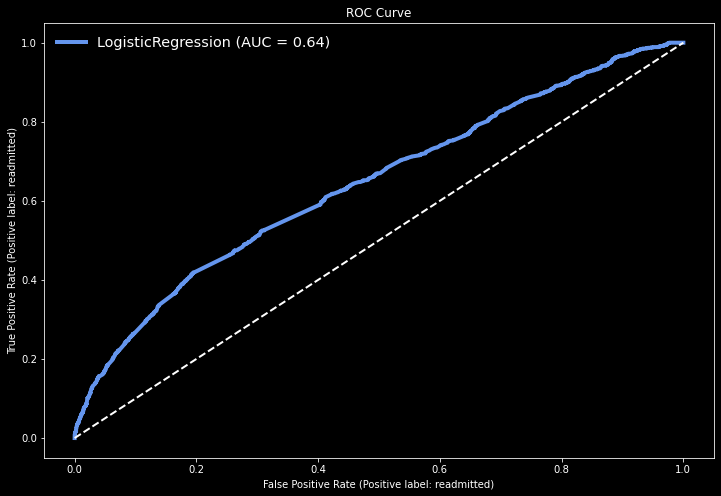

In [54]:
fig,ax = plt.subplots(figsize =(12,8))
m.plot_roc_curve(logit_fitted, 
                 X_test, 
                 y_test,
                 lw=4,
                 color='cornflowerblue',
                 ax=ax)
plt.plot([0, 1], 
         [0, 1], 
         color='white', 
         lw=2, 
         linestyle='--')
plt.legend(frameon=False,fontsize='x-large')
plt.title('ROC Curve')

Text(0.5, 1.0, 'ROC Curve')

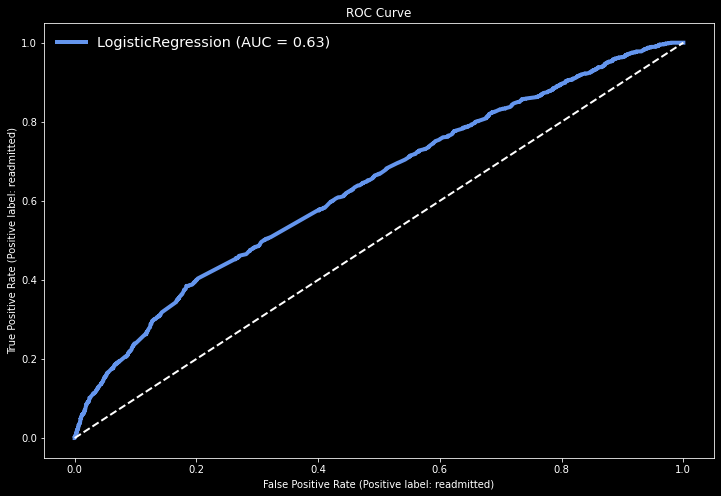

In [55]:
fig,ax = plt.subplots(figsize =(12,8))
m.plot_roc_curve(logit_fitted, 
                 X_validate, 
                 y_validate,
                 lw=4,
                 color='cornflowerblue',
                 ax=ax)
plt.plot([0, 1], 
         [0, 1], 
         color='white', 
         lw=2, 
         linestyle='--')
plt.legend(frameon=False,fontsize='x-large')
plt.title('ROC Curve')

## Probability output

In [56]:
logit_fitted.predict_proba(X_test)


array([[0.42498588, 0.57501412],
       [0.56013164, 0.43986836],
       [0.31568897, 0.68431103],
       ...,
       [0.46256651, 0.53743349],
       [0.46256651, 0.53743349],
       [0.61861821, 0.38138179]])